In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Paths to folders
adults_folder = "Adult_fatfrac/"
segmentation_folder = "Adult_seg/"
output_folder = "Adult_NASH/"
# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

# Process each scan
for file in os.listdir(adults_folder):
    if file.endswith(".nii"):
        scan_path = os.path.join(adults_folder, file)
        mask_path = os.path.join(segmentation_folder, file)  # Assuming same filename for mask
        
        if not os.path.exists(mask_path):
            print(f"Mask for {file} not found!")
            continue
        
        # Load scan and mask
        scan_nii = nib.load(scan_path)
        mask_nii = nib.load(mask_path)
        
        scan_data = scan_nii.get_fdata()
        mask_data = mask_nii.get_fdata()
        
        # Ensure scan and mask dimensions match
        assert scan_data.shape == mask_data.shape, f"Dimension mismatch for {file}"
        
        # Process each slice
        for i in range(scan_data.shape[2]):  # Iterate through slices
            scan_slice = scan_data[:, :, i]
            mask_slice = mask_data[:, :, i]
            
            # Retain only the region covered by the mask
            masked_scan = np.where(mask_slice > 0, scan_slice, 0)
            
            # Plot and save
            plt.figure()
            plt.imshow(masked_scan, cmap='gray')
            plt.axis('off')
            
            output_path = os.path.join(output_folder, f"{file[:-4]}_slice_{i}.png")
            #print(f"Processing slice {i}: Dimensions = {scan_slice.shape}")

            plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
            plt.close()



In [2]:
path = 'Adult_NASH/'

image_extensions = ('.png')
image_count = len([file for file in os.listdir(path) if file.lower().endswith(image_extensions)])
print(image_count)

3088


In [3]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Paths to folders
adults_folder = "Ped_fatfrac/"
segmentation_folder = "Ped_seg/"
output_folder = "Ped_NAFLD/"
# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

# Process each scan
for file in os.listdir(adults_folder):
    if file.endswith(".nii"):
        scan_path = os.path.join(adults_folder, file)
        mask_path = os.path.join(segmentation_folder, file)  # Assuming same filename for mask
        
        if not os.path.exists(mask_path):
            print(f"Mask for {file} not found!")
            continue
        
        # Load scan and mask
        scan_nii = nib.load(scan_path)
        mask_nii = nib.load(mask_path)
        
        scan_data = scan_nii.get_fdata()
        mask_data = mask_nii.get_fdata()
        
        # Ensure scan and mask dimensions match
        assert scan_data.shape == mask_data.shape, f"Dimension mismatch for {file}"
        
        # Process each slice
        for i in range(scan_data.shape[2]):  # Iterate through slices
            scan_slice = scan_data[:, :, i]
            mask_slice = mask_data[:, :, i]
            
            # Retain only the region covered by the mask
            masked_scan = np.where(mask_slice > 0, scan_slice, 0)
            
            # Plot and save
            plt.figure()
            plt.imshow(masked_scan, cmap='gray')
            plt.axis('off')
            
            output_path = os.path.join(output_folder, f"{file[:-4]}_slice_{i}.png")
            print(f"Processing slice {i}: Dimensions = {scan_slice.shape}")

            plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
            plt.close()

Processing slice 0: Dimensions = (224, 224)
Processing slice 1: Dimensions = (224, 224)
Processing slice 2: Dimensions = (224, 224)
Processing slice 3: Dimensions = (224, 224)
Processing slice 4: Dimensions = (224, 224)
Processing slice 5: Dimensions = (224, 224)
Processing slice 6: Dimensions = (224, 224)
Processing slice 7: Dimensions = (224, 224)
Processing slice 8: Dimensions = (224, 224)
Processing slice 9: Dimensions = (224, 224)
Processing slice 10: Dimensions = (224, 224)
Processing slice 11: Dimensions = (224, 224)
Processing slice 12: Dimensions = (224, 224)
Processing slice 13: Dimensions = (224, 224)
Processing slice 14: Dimensions = (224, 224)
Processing slice 15: Dimensions = (224, 224)
Processing slice 16: Dimensions = (224, 224)
Processing slice 17: Dimensions = (224, 224)
Processing slice 18: Dimensions = (224, 224)
Processing slice 19: Dimensions = (224, 224)
Processing slice 20: Dimensions = (224, 224)
Processing slice 21: Dimensions = (224, 224)
Processing slice 22:

In [4]:
path = 'Ped_NAFLD/'

image_extensions = ('.png')
image_count = len([file for file in os.listdir(path) if file.lower().endswith(image_extensions)])
print(image_count)

2929


In [5]:
import os
import shutil

# Paths to source and destination folders
source_folder = 'Adult_NASH/'
destination_folder = 'dataset/val/adult'

# Supported image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Get all image files in the source folder, sorted by their names
all_images = sorted([file for file in os.listdir(source_folder) if file.lower().endswith(image_extensions)])

# Take the last 617 images
images_to_move = all_images[-739:]

# Move images to the destination folder
for image in images_to_move:
    src_path = os.path.join(source_folder, image)
    dest_path = os.path.join(destination_folder, image)
    shutil.move(src_path, dest_path)

print(f"Moved {len(images_to_move)} images to '{destination_folder}'.")

Moved 739 images to 'dataset/val/adult'.


In [6]:
import os
import shutil

# Paths to source and destination folders
source_folder = 'Adult_NASH/'
destination_folder = 'dataset/train/adult'

# Supported image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Get all image files in the source folder, sorted by their names
all_images = [file for file in os.listdir(source_folder) if file.lower().endswith(image_extensions)]

# Move images to the destination folder
for image in all_images:
    src_path = os.path.join(source_folder, image)
    dest_path = os.path.join(destination_folder, image)
    shutil.move(src_path, dest_path)

print(f"Moved {len(all_images)} images to '{destination_folder}'.")

Moved 2349 images to 'dataset/train/adult'.


In [7]:
import os
import shutil

# Paths to source and destination folders
source_folder = 'Ped_NAFLD/'
destination_folder = 'dataset/val/ped'

# Supported image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Get all image files in the source folder, sorted by their names
all_images = sorted([file for file in os.listdir(source_folder) if file.lower().endswith(image_extensions)])

# Take the last 617 images
images_to_move = all_images[-580:]

# Move images to the destination folder
for image in images_to_move:
    src_path = os.path.join(source_folder, image)
    dest_path = os.path.join(destination_folder, image)
    shutil.move(src_path, dest_path)

print(f"Moved {len(images_to_move)} images to '{destination_folder}'.")

Moved 580 images to 'dataset/val/ped'.


In [8]:
import os
import shutil

# Paths to source and destination folders
source_folder = 'Ped_NAFLD/'
destination_folder = 'dataset/train/ped'

# Supported image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Get all image files in the source folder, sorted by their names
all_images = [file for file in os.listdir(source_folder) if file.lower().endswith(image_extensions)]

# Move images to the destination folder
for image in all_images:
    src_path = os.path.join(source_folder, image)
    dest_path = os.path.join(destination_folder, image)
    shutil.move(src_path, dest_path)

print(f"Moved {len(all_images)} images to '{destination_folder}'.")

Moved 2349 images to 'dataset/train/ped'.


In [ ]:
########training ########


Training VGG16...
Found 4698 images belonging to 2 classes.
Found 1319 images belonging to 2 classes.


58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/300


147/147 [==============================] - 165s 1s/step - loss: 0.7968 - accuracy: 0.5283 - val_loss: 0.6476 - val_accuracy: 0.6247
Epoch 2/300
147/147 [==============================] - 163s 1s/step - loss: 0.5871 - accuracy: 0.6909 - val_loss: 0.5983 - val_accuracy: 0.6763
Epoch 3/300
147/147 [==============================] - 162s 1s/step - loss: 0.5483 - accuracy: 0.7218 - val_loss: 0.5722 - val_accuracy: 0.6937
Epoch 4/300
147/147 [==============================] - 163s 1s/step - loss: 0.5269 - accuracy: 0.7346 - val_loss: 0.5680 - val_accuracy: 0.6960
Epoch 5/300
147/147 [==============================] - 163s 1s/step - loss: 0.5099 - accuracy: 0.7448 - val_loss: 0.5553 - val_accuracy: 0.7074
Epoch 6/300
147/147 [==============================] - 164s 1s/step - loss: 0.4992 - accuracy: 0.7463 - val_

c:\Users\Mittal\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 29s 672ms/step


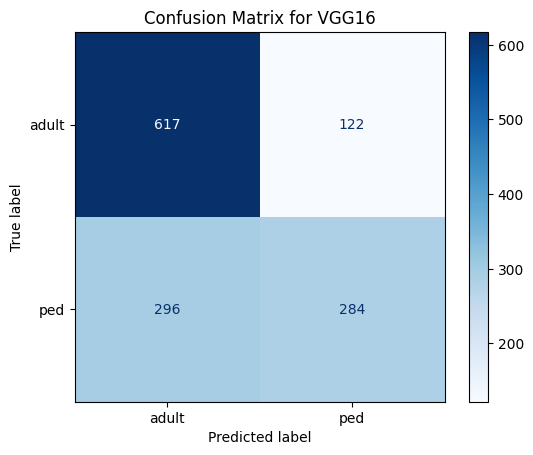

Classification Report for VGG16:
              precision    recall  f1-score   support

       adult       0.68      0.83      0.75       739
         ped       0.70      0.49      0.58       580

    accuracy                           0.68      1319
   macro avg       0.69      0.66      0.66      1319
weighted avg       0.69      0.68      0.67      1319

Training InceptionV3...
Found 4698 images belonging to 2 classes.
Found 1319 images belonging to 2 classes.
87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/300
147/147 [==============================] - 75s 477ms/step - loss: 0.6111 - accuracy: 0.6537 - val_loss: 0.5991 - val_accuracy: 0.6664
Epoch 2/300
147/147 [==============================] - 68s 459ms/step - loss: 0.5519 - accuracy: 0.7097 - val_loss: 0.5914 - val_accuracy: 0.6664
Epoch 3/300
147/147 [==============================] - 70s 474ms/step - loss: 0.5251 - accuracy: 0.7222 - val_loss: 0.5830 - val_accuracy: 0.6770
Epoch 4/300
147/147 [========

c:\Users\Mittal\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


InceptionV3 model saved as InceptionV3_binary_classifier.h5
Generating confusion matrix for InceptionV3...
42/42 [==============================] - 17s 362ms/step


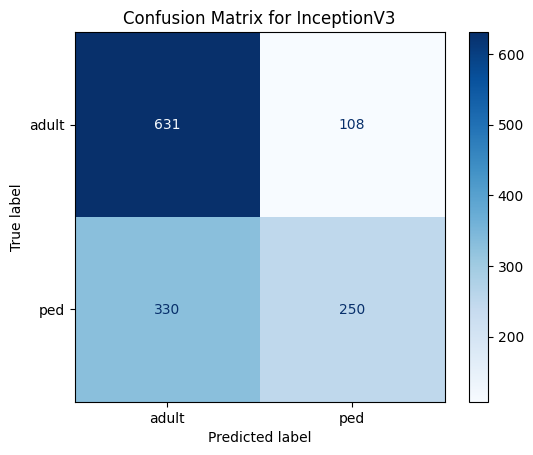

Classification Report for InceptionV3:
              precision    recall  f1-score   support

       adult       0.66      0.85      0.74       739
         ped       0.70      0.43      0.53       580

    accuracy                           0.67      1319
   macro avg       0.68      0.64      0.64      1319
weighted avg       0.67      0.67      0.65      1319

Training ResNet50...
Found 4698 images belonging to 2 classes.
Found 1319 images belonging to 2 classes.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/300
147/147 [==============================] - 106s 695ms/step - loss: 0.5778 - accuracy: 0.6922 - val_loss: 0.6121 - val_accuracy: 0.6672
Epoch 2/300
147/147 [==============================] - 100s 682ms/step - loss: 0.5104 - accuracy: 0.7412 - val_loss: 0.6110 - val_accuracy: 0.6619
Epoch 3/300
147/147 [==============================] - 100s 683ms/step - loss: 0.4832 - accuracy: 0.7527 - val_loss: 0.6199 - val_accuracy: 0.6687
Epoch 4/300
147/147 [==

c:\Users\Mittal\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


ResNet50 model saved as ResNet50_binary_classifier.h5
Generating confusion matrix for ResNet50...
42/42 [==============================] - 23s 524ms/step


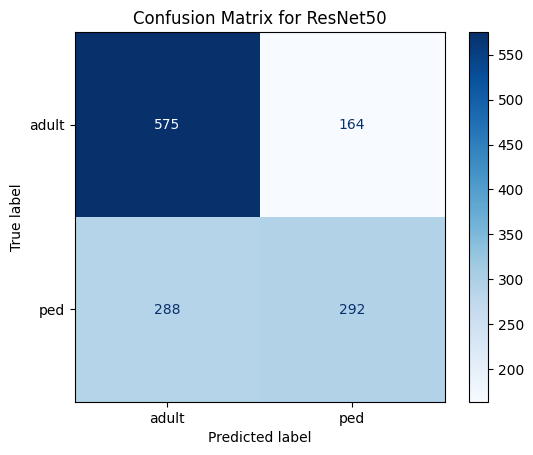

Classification Report for ResNet50:
              precision    recall  f1-score   support

       adult       0.67      0.78      0.72       739
         ped       0.64      0.50      0.56       580

    accuracy                           0.66      1319
   macro avg       0.65      0.64      0.64      1319
weighted avg       0.65      0.66      0.65      1319

Training DenseNet121...
Found 4698 images belonging to 2 classes.
Found 1319 images belonging to 2 classes.
29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/300
147/147 [==============================] - 101s 638ms/step - loss: 0.6352 - accuracy: 0.6286 - val_loss: 0.5846 - val_accuracy: 0.6785
Epoch 2/300
147/147 [==============================] - 91s 618ms/step - loss: 0.5626 - accuracy: 0.7069 - val_loss: 0.5731 - val_accuracy: 0.6861
Epoch 3/300
147/147 [==============================] - 91s 619ms/step - loss: 0.5387 - accuracy: 0.7199 - val_loss: 0.5715 - val_accuracy: 0.6839
Epoch 4/300
147/147 [====

c:\Users\Mittal\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


DenseNet121 model saved as DenseNet121_binary_classifier.h5
Generating confusion matrix for DenseNet121...
42/42 [==============================] - 22s 469ms/step


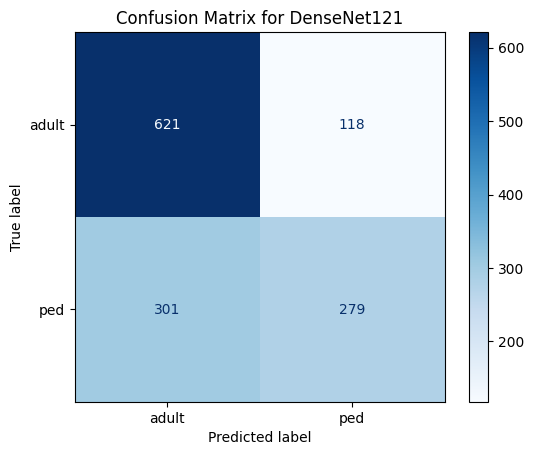

Classification Report for DenseNet121:
              precision    recall  f1-score   support

       adult       0.67      0.84      0.75       739
         ped       0.70      0.48      0.57       580

    accuracy                           0.68      1319
   macro avg       0.69      0.66      0.66      1319
weighted avg       0.69      0.68      0.67      1319

Training and evaluation completed for all models.


In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as preprocess_input_vgg
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input as preprocess_input_inception
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input as preprocess_input_densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths to dataset
train_dir = 'dataset/train'
val_dir = 'dataset/val'

# Parameters
batch_size = 32
epochs = 300
img_size_vgg = (224, 224)
img_size_inception = (299, 299)
img_size_resnet = (224, 224)
img_size_densenet = (224, 224)

# Function to build and compile model
def build_model(base_model_fn, input_shape=(224, 224, 3)):
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)  # Binary classification
    model = Model(inputs=base_model.input, outputs=output)
    
    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to generate confusion matrix
def generate_confusion_matrix(model, val_generator, model_name):
    print(f"Generating confusion matrix for {model_name}...")
    true_labels = val_generator.classes
    predictions = model.predict(val_generator)
    predicted_labels = (predictions > 0.5).astype(int).flatten()
    
    # Confusion matrix and classification report
    cm = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    report = classification_report(true_labels, predicted_labels, target_names=val_generator.class_indices.keys())
    print(f"Classification Report for {model_name}:\n{report}")


# Training and evaluation for each model
models = {
    'VGG16': (VGG16, preprocess_input_vgg, img_size_vgg),
    'InceptionV3': (InceptionV3, preprocess_input_inception, img_size_inception),
    'ResNet50': (ResNet50, preprocess_input_resnet, img_size_resnet),
    'DenseNet121': (DenseNet121, preprocess_input_densenet, img_size_densenet)
}

for model_name, (model_fn, preprocess_input_fn, img_size) in models.items():
    print(f"Training {model_name}...")
    
    # Data generators
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input_fn)
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )
    val_generator = datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )
    
    # Build and train model
    model = build_model(model_fn, input_shape=(img_size[0], img_size[1], 3))
    model.fit(train_generator, epochs=epochs, validation_data=val_generator, verbose=1)
    
    # Save model
    model_path = f"{model_name}_binary_classifier.h5"
    model.save(model_path)
    print(f"{model_name} model saved as {model_path}")
    
    # Generate confusion matrix
    generate_confusion_matrix(model, val_generator, model_name)

print("Training and evaluation completed for all models.")